In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sales = pd.read_csv("historical_automobile_sales.csv")
sales


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [7]:
sales_by_year = sales.groupby('Year')['Automobile_Sales'].sum()
sales_by_year

Year
1980     8147.40
1981     7600.90
1982     7573.80
1983    34672.20
1984    35667.00
1985    38113.60
1986    28093.60
1987    27458.00
1988    36894.00
1989    38971.30
1990    11007.30
1991     7870.70
1992    19772.40
1993    24279.00
1994    30657.90
1995    51603.00
1996    27542.50
1997    33482.90
1998    35938.70
1999    30752.20
2000    15441.50
2001     8305.60
2002    21398.60
2003    31547.90
2004    37786.60
2005    36918.80
2006    30691.80
2007    32726.00
2008    15474.60
2009     7580.30
2010    27703.20
2011    39915.60
2012    33386.60
2013    29767.00
2014    40354.90
2015    40226.80
2016    33669.64
2017    30309.80
2018    38167.30
2019    33524.80
2020    28262.00
2021    37392.50
2022    24529.70
2023    31055.20
Name: Automobile_Sales, dtype: float64

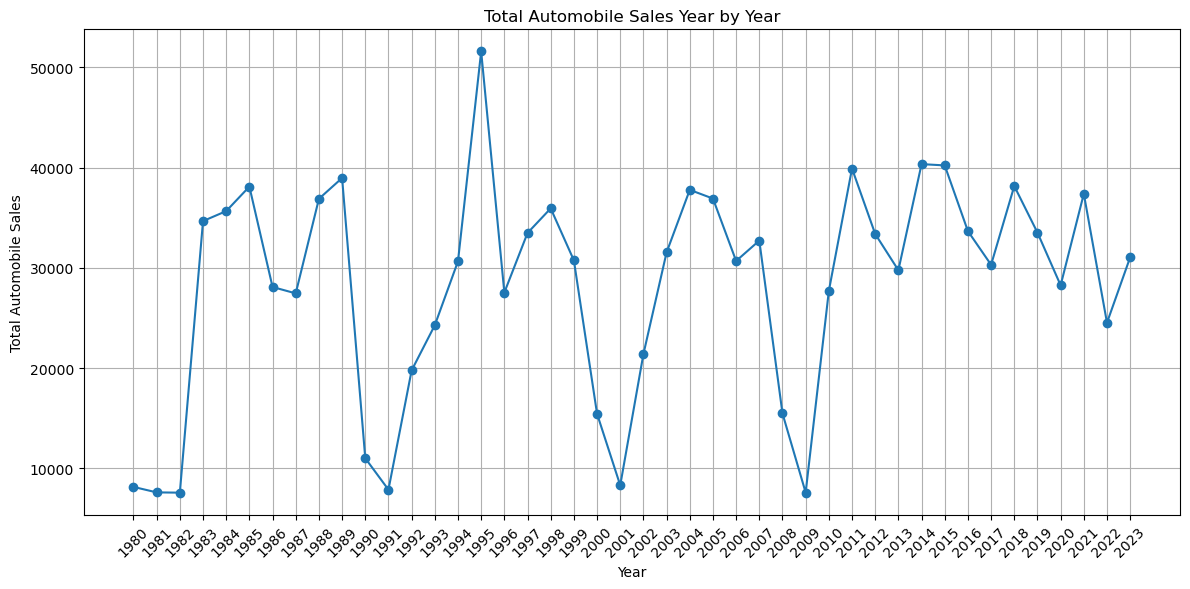

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.title('Total Automobile Sales Year by Year')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.grid(True)
plt.xticks(sales_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

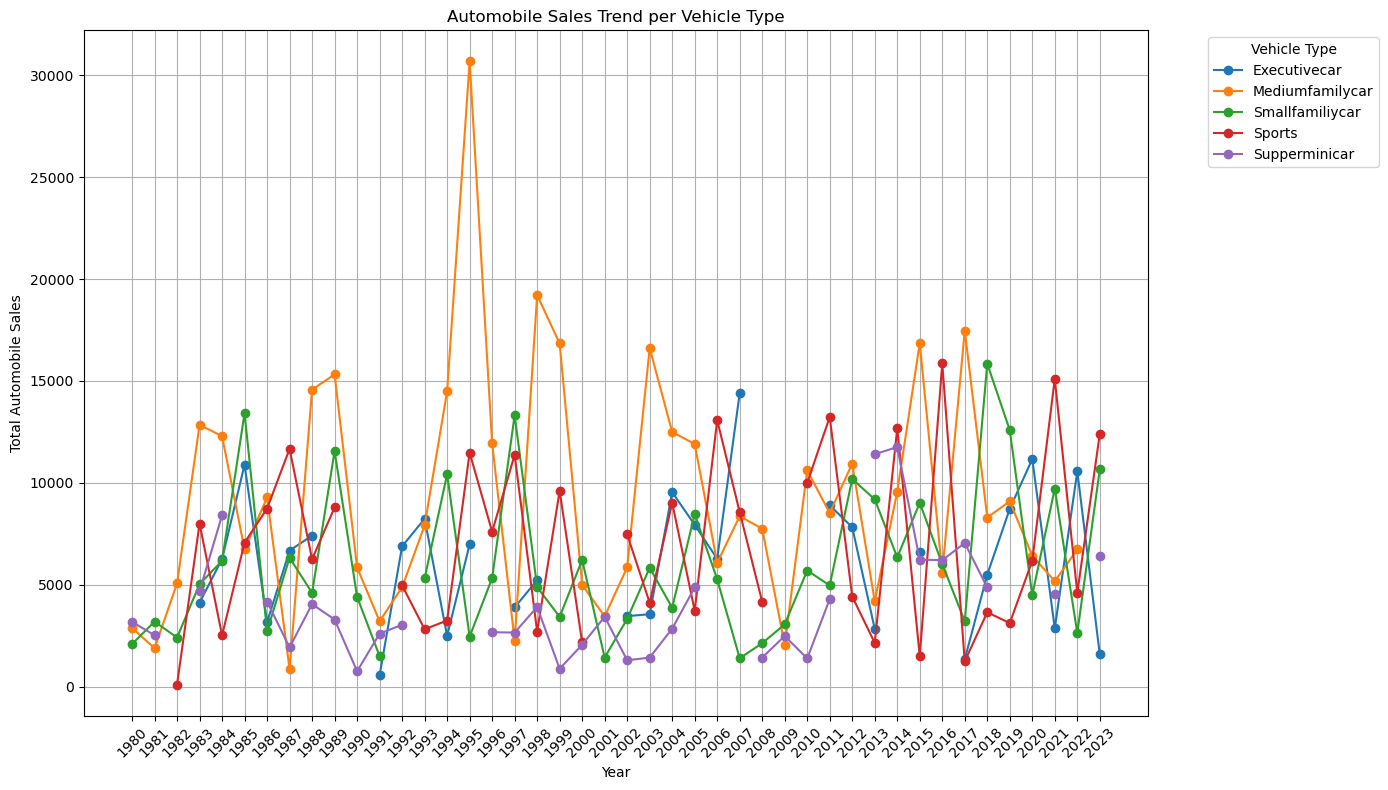

In [15]:
sales_by_year_type = sales.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()
plt.figure(figsize=(14, 8))
for vehicle_type in sales_by_year_type.columns:
    plt.plot(sales_by_year_type.index, sales_by_year_type[vehicle_type], marker='o', label=vehicle_type)
plt.title('Automobile Sales Trend per Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(sales_by_year_type.index, rotation=45)
plt.tight_layout()
plt.show()


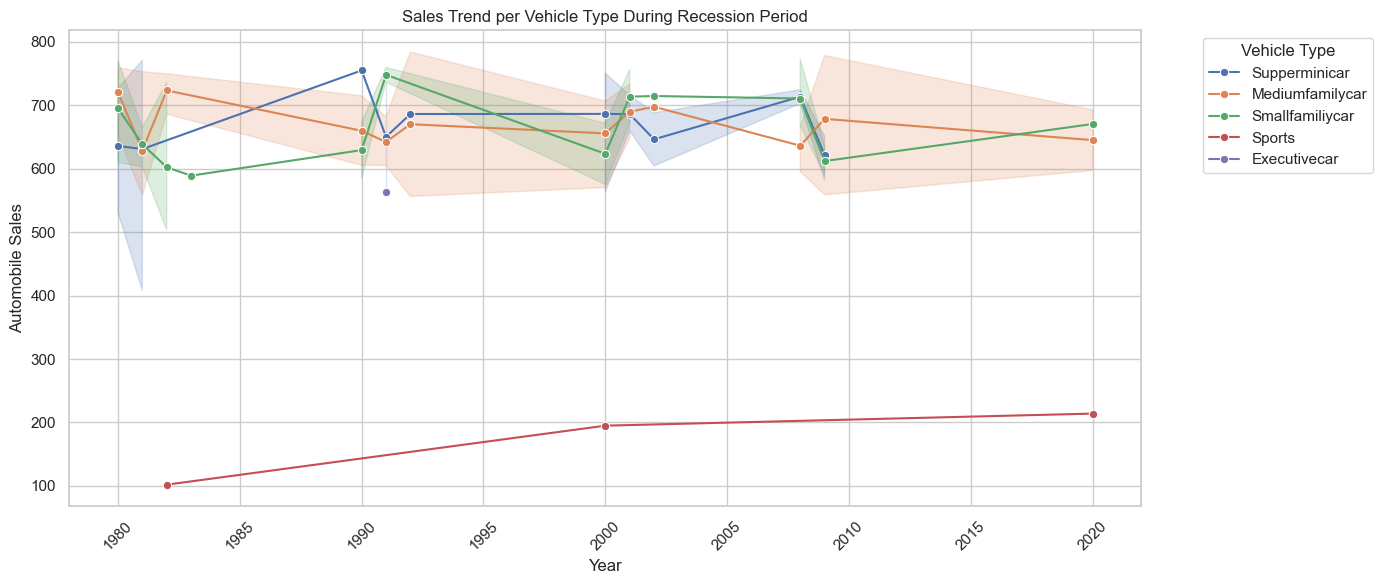

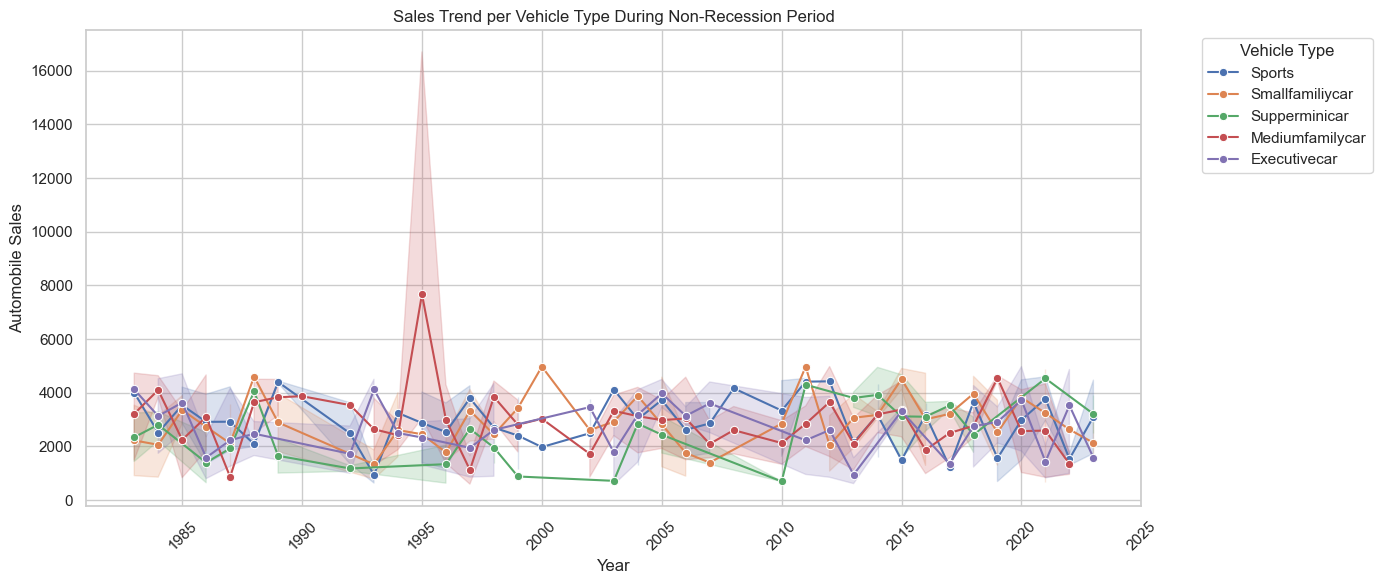

In [21]:
import seaborn as sns
sns.set(style="whitegrid")
recession_data = sales[sales['Recession'] == 1]
non_recession_data = sales[sales['Recession'] == 0]
plt.figure(figsize=(14, 6))
sns.lineplot(data=recession_data, x='Year', y='Automobile_Sales', hue='Vehicle_Type', marker="o")
plt.title('Sales Trend per Vehicle Type During Recession Period')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 6))
sns.lineplot(data=non_recession_data, x='Year', y='Automobile_Sales', hue='Vehicle_Type', marker="o")
plt.title('Sales Trend per Vehicle Type During Non-Recession Period')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


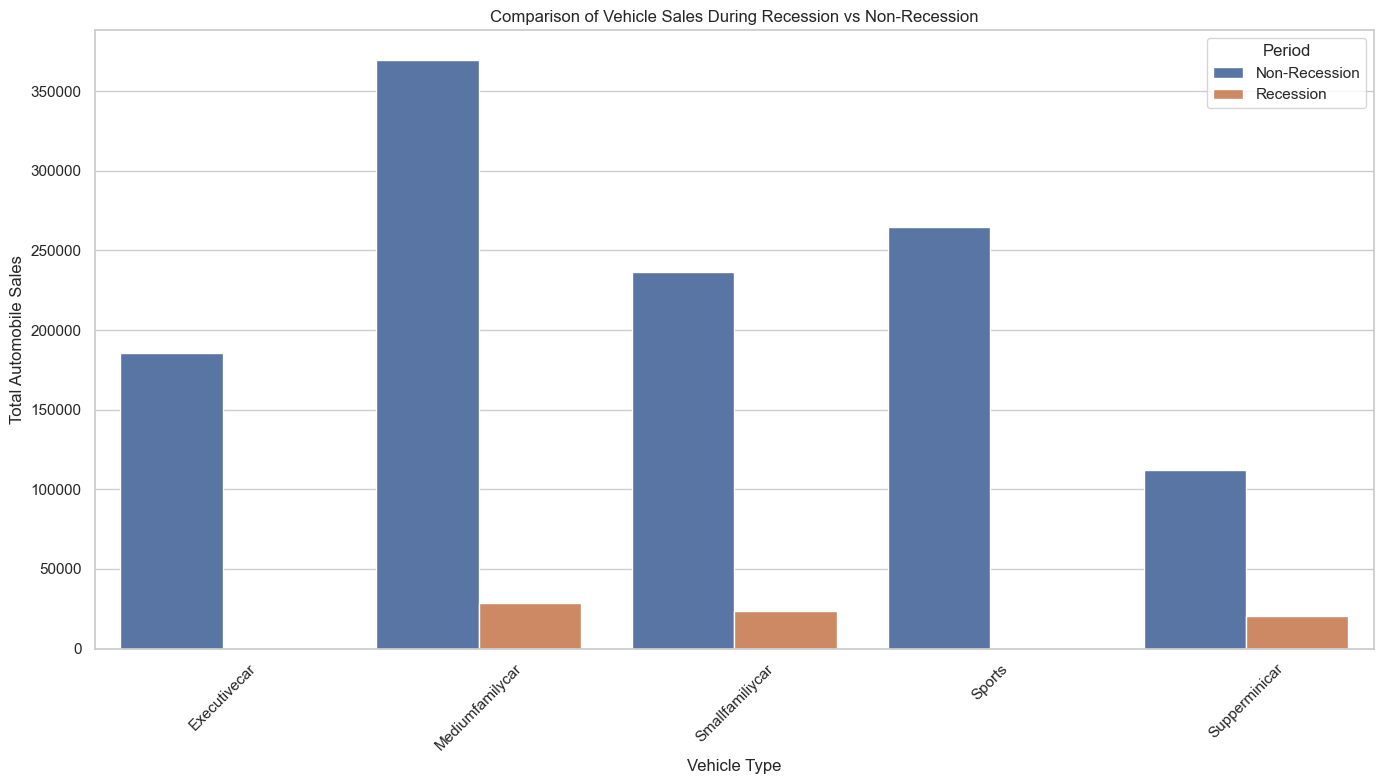

In [23]:
comparison = sales.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()
comparison['Recession'] = comparison['Recession'].map({0: 'Non-Recession', 1: 'Recession'})
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')
plt.title('Comparison of Vehicle Sales During Recession vs Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Automobile Sales')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()
